In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('oppe1.csv')

How many total number of features (excluding target variable) are there in the dataset?

In [4]:
df.shape[1]-1

11

In [5]:
df['type_of_policy'].unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

 Which of the following columns have categorical data?

In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", list(categorical_cols))

Categorical columns: ['gender', 'area', 'qualification', 'num_policies', 'policy', 'type_of_policy']


Plot the heatmap and mark the pair which has the highest positive correlation value.

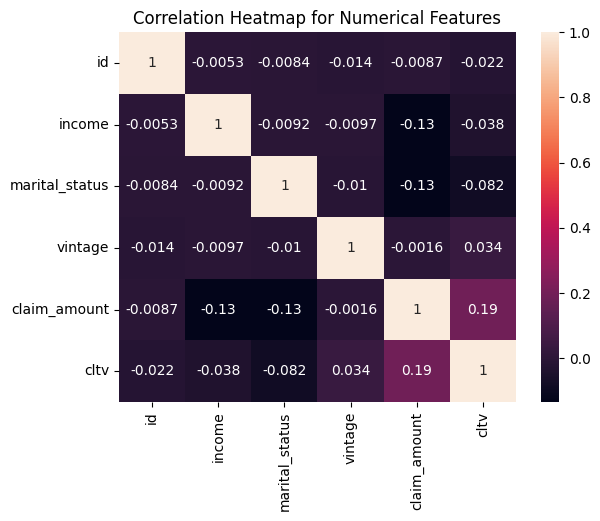

In [8]:
num_features = df.select_dtypes(exclude='object').columns
corr = df[num_features].corr()

sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

Which of the following features have missing values?

In [9]:
df.isna().sum()

id                  0
gender              0
area              384
qualification       0
income            401
marital_status      0
vintage             0
claim_amount      360
num_policies        0
policy            372
type_of_policy      0
cltv                0
dtype: int64

 Break the dataset into features(X) and label (y), where the column cltv goes to y and the rest of the columns go to X. Enter the avg value of cltv column?

In [11]:
X = df.drop('cltv', axis=1)
y = df['cltv']
y.mean()

np.float64(97788.08438548826)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(4379, 11)

Drop(remove) id column from train and test data because it is not useful in model training. Now how many feature columns are remaining in the training dataset?

In [13]:
# Drop id column
X_train = X_train.drop('id', axis=1)
X_test = X_test.drop('id', axis=1)
X_train.shape[1]

10

Compute and write median of the income column of X_train while ignoring the missing values. Replace all NaN values in the income column of X_train and X_test by the median computed from the X_train (upto two decimal).

In [14]:
X_train['income'].median()

np.float64(7.04)

In [16]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy='median', missing_values=np.nan)
X_train['income'] = imputer1.fit_transform(X_train[['income']])
X_test['income'] = imputer1.fit_transform(X_test[['income']])

In [17]:
print(X_train['income'].isna().sum())

0


In [18]:
print(X_test['income'].isna().sum())

0


Which is the most frequent value in the policy column of X_train? Replace all NaN value in policy column of X_train and X_test by most frequent value in X_train

In [19]:
X_train['policy'].value_counts()

policy
A    2583
B    1160
C     392
Name: count, dtype: int64

In [ ]:
X_train['policy'] = X_train['policy'].fillna('A')
X_test['policy'] = X_test['policy'].fillna('A')

Which is the most frequent value in the area column of X_train? Replace all NaN value in area column of X_train and X_test by most frequent value from X_train

In [20]:
X_train['area'].value_counts()

area
Urban    2920
Rural    1191
Name: count, dtype: int64

In [ ]:
X_train['policy'] = X_train['policy'].fillna('Urban')
X_test['policy'] = X_test['policy'].fillna('Urban')

 Replace all NaN value in claim_amount column of X_train and X_test by 0 (Zero). After Replacing NAN values from claim_amount column what is the standard deviation of claim_amount column in X_train. (correct upto two decimal places)

In [21]:
X_train['claim_amount'] = X_train['claim_amount'].fillna(0)
X_test['claim_amount'] = X_test['claim_amount'].fillna(0)
X_train['claim_amount'].std()

np.float64(3358.6559076843696)

Apply MinMaxScaler on income column of X_train. Compute and write median of income column? (correct Upto 2 decimal)[NAT]

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
# mms=MinMaxScaler()
X_train['income'] = MinMaxScaler().fit_transform(X_train[['income']])
X_train['income'].median()

np.float64(0.07004709890770619)

Apply preprocessing on features of X_train and X_test dataset.
For Categorical Features
Apply OneHotEncoding from sklearn library on all categorical features(object columns). Do Encoding in the order of following list

Categorical Features = ['gender', 'area','qualification','marital_status', 'num_policies', 'policy', 'type_of_policy']

Lets call the transformed caterical feature matrix  X1 

For Numerical Features
apply MinMaxScaler and transform the dataset. Do scaling in the order of following list:

Numerical Features = [ 'income', 'vintage', 'claim_amount' ]

Lets call the transformed numerical feature matrix  X2 

concatenate(One Hot Encoded Features, Scaled Numerical Features)
After combining transformed categorical feature( X1 ) matrix and transformed numerical feature matrix ( X2 ) (side by side in that order), the output will be  X=[X1X2] 

Hints
Apply ColumnTransformer to encode categorical columns and scaling on numerical columns with required preprocessor

Another way is to separately encode all categorical columns and scale numerical columns and do concatenate (h-stack) both. keep categorical columns in front of numerical while concatenating.

The transformed (as desribed by above steps) X_train and X_test, should be considered as X_train and X_test henceforth

In [24]:
# Encoding the categorical features
cat_data = ['gender', 'area','qualification','marital_status', 'num_policies', 'policy', 'type_of_policy']

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encode_tf = [('OneHotEncoding', OneHotEncoder(sparse_output=False), cat_data)]
encode_ct = ColumnTransformer(encode_tf, remainder='drop', verbose_feature_names_out=False).set_output(transform='pandas')
encode_ct

,transformers,"[('OneHotEncoding', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [25]:
# Scaling the numerical features
num_data = ['income', 'vintage', 'claim_amount']

scale_tf = [('MinMaxScaling', MinMaxScaler(), num_data)]
scale_ct = ColumnTransformer(scale_tf, remainder='drop', verbose_feature_names_out=False).set_output(transform='pandas')
scale_ct

,transformers,"[('MinMaxScaling', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [26]:
# horizontal stacking the results of both transformers
from sklearn.pipeline import FeatureUnion
feature_union = FeatureUnion([('encoding', encode_ct),
                              ('scaling', scale_ct)]).set_output(transform='pandas')
feature_union

,transformer_list,"[('encoding', ...), ('scaling', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None


In [27]:
# Transforming the train and test matrix
train_tf = feature_union.fit_transform(X_train)
test_tf = feature_union.transform(X_test)

In [28]:
train_tf.shape[1]

22

Apply SequentialFeatureSelector transformer with direction= 'forward' with LinearRegression() estimator and select 5 features by fitting to the X_train and y_train.
Use cv = KFold(n_splits=5,random_state=42,shuffle=True) in SequentialFeatureSelector.

Which of the following options represents the correct integer index of the selected features list?

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

sfs_16 = SequentialFeatureSelector(LinearRegression(),
                                   n_features_to_select=5,
                                   direction='forward',
                                   cv = KFold(n_splits=5,random_state=42,shuffle=True))
sfs_16.fit(train_tf, y_train)

,estimator,LinearRegression()
,n_features_to_select,5
,tol,None
,direction,'forward'
,scoring,None
,cv,KFold(n_split... shuffle=True)
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [30]:
sfs_16.support_

array([False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False,  True])

In [33]:
selected_indices = sfs_16.get_support(indices=True)
print(selected_indices)


[ 7 10 12 14 21]


Apply LinearRegression on the trainig set(X_train and y_train). What is the R2 score on the test set(X_test and y_test). ( Upto 4 digits after decimal points)

In [34]:
lr = LinearRegression()
lr.fit(train_tf, y_train)
lr.score(test_tf, y_test)

0.09126718521461241

Using the LinearRegression model, compute the cross-validation scores for 5 splits on training data (X_train and y_train) using cross_val_score.Enter the maximum value of 𝑅2 score ( Upto 4 digits after decimal points) obtained.

In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr, train_tf, y_train, cv = KFold(n_splits=5,random_state=42,shuffle=True) )
score.max()

np.float64(0.18170324322592468)

Apply Ridge regression with random_state=42 with default penalty value on training set(X_train and y_train) and calculate the 𝑅2 score on test_set (X_test and y_test). What is the correct score ( Upto 4 digits after decimal points)

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=42)
ridge.fit(train_tf, y_train)
ridge.score(test_tf, y_test)

0.09747940411058043

In [42]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=42,  alpha=0.1)
lasso.fit(train_tf, y_train)
lasso.score(test_tf, y_test)
lasso.intercept_

c:\Users\KIIT0001\OneDrive\Desktop\mlpractice\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.748e+10, tolerance: 3.548e+09
  model = cd_fast.enet_coordinate_descent(


np.float64(102824.49381796486)

Fit SGDRegressor(random_state=42) estimator on the training data(X_train & y_train) and predict labels for test_data(X_test), lets call it as y_test_predict. The parameters are initialized with default values. Calculate and mark the correct mean_absolute_error value between y_test and y_test_predict from the given options. (Correct upto two decimals)

In [43]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
sgd = SGDRegressor(random_state=42)
sgd.fit(train_tf, y_train)
y_test_predict = sgd.predict(test_tf)
mean_absolute_error(y_test, y_test_predict)

52789.80994173832

Using SGDRegressor(random_state=42) as an estimator for exactly 10 iterations. Write the correct R2 score on test data

In [44]:
from sklearn.metrics import r2_score
sgd = SGDRegressor(random_state=42, max_iter=10)
sgd.fit(train_tf, y_train)
r2_score(y_test, sgd.predict(test_tf))

c:\Users\KIIT0001\OneDrive\Desktop\mlpractice\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.13554341219195998

Create a pipeline Using PolynomialFeatures as transformer and Lasso as estimator. Use GridSearchCV with this created pipeline and following hyperparameter values on training data(X_train, y_train) to fit the model .

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('lasso', Lasso())]).set_output(transform='pandas')

param_grid_23 = {'poly__degree': [1, 2],
              'lasso__alpha': np.logspace(-3, 0, num=5)}

grid_23 = GridSearchCV(pipe, param_grid_23, scoring='neg_mean_absolute_error')
grid_23.fit(train_tf, y_train)

c:\Users\KIIT0001\OneDrive\Desktop\mlpractice\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.758e+10, tolerance: 2.824e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\KIIT0001\OneDrive\Desktop\mlpractice\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.360e+10, tolerance: 2.863e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\KIIT0001\OneDrive\Desktop\mlpractice\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

,estimator,"Pipeline(step...o', Lasso())])"
,param_grid,"{'lasso__alpha': array([0.001 ..., 1. ]), 'poly__degree': [1, 2]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,degree,1


In [46]:
grid_23.best_params_

{'lasso__alpha': np.float64(1.0), 'poly__degree': 1}

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5,
svd_solver='full',
whiten=True,
random_state=42)
pca.fit(train_tf)
pca.explained_variance_ratio_
pca.explained_variance_ratio_.sum()

np.float64(0.6319815734614824)

Use PCA transformed training data from earlier question and y_train to fit the RidgeCV estimator model having alpha value as [0.001,0.01,0.1,1]. Calculate the R2 score you got from the model for transformed test data(PCA transformed X_test).

In [49]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[0.001,0.01,0.1,1])
ridgecv.fit(pca.transform(train_tf), y_train)
r2_score(y_test, ridgecv.predict(pca.transform(test_tf)))

0.07931420090845687